In [1]:
from pathlib import Path
from deep_t2i.trainer_GAN import BirdsTrainer

from deep_t2i.model import Birds_Export
from deep_t2i.inference_birds import pred_and_show

In [2]:
# all_skip

# Birds GAN
> 

In [3]:
data_dir = Path('/root/data/birds')
model_dir = Path('../models/large_birds/gan')
result_dir = Path('../result_jpgs/large_birds/gan')
pretrained_damsm_path = Path('../models/large_birds/damsm/damsm_export.pt')
data_dir, model_dir, result_dir, pretrained_damsm_path

(Path('/root/data/birds'),
 Path('../models/large_birds/gan'),
 Path('../result_jpgs/large_birds/gan'),
 Path('../models/large_birds/damsm/damsm_export.pt'))

## Train

In [4]:
bs = 24
data_pct = 1
g_lr = 2e-4
d_lr = 2e-4
smooth_lambda = 2.0
noise_sz = 512
trainer = BirdsTrainer(
    data_dir, 
    bs=bs, 
    data_pct=data_pct,
    g_lr=g_lr, 
    d_lr=d_lr,
    device='cuda', 
    pretrained_damsm_path=pretrained_damsm_path,
    smooth_lambda=smooth_lambda,
    noise_sz=noise_sz,
)

In [5]:
len(trainer.dls.train)

491

In [6]:
ema_decay = 0.999
n_gradient_acc = 1
step_per_epoch = len(trainer.dls.train) // (n_gradient_acc*1)
step_per_epoch

491

In [ ]:
trainer.train(
    n_step=step_per_epoch*52, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'0'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*4, 
    ck_path=str(model_dir/'0'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 662.3s, g_loss: 26.1808, d_loss: 2.0535
2, time: 663.1s, g_loss: 16.7359, d_loss: 1.9039
3, time: 662.7s, g_loss: 11.0985, d_loss: 2.0067
4, time: 663.8s, g_loss: 9.9363, d_loss: 1.9280
5, time: 661.9s, g_loss: 8.2628, d_loss: 1.9365
6, time: 660.8s, g_loss: 7.7386, d_loss: 1.9360
7, time: 661.0s, g_loss: 7.8178, d_loss: 1.7912
8, time: 665.1s, g_loss: 7.7765, d_loss: 1.8367
9, time: 661.4s, g_loss: 7.3426, d_loss: 1.8761
10, time: 661.2s, g_loss: 7.3601, d_loss: 1.8224
11, time: 661.1s, g_loss: 7.7167, d_loss: 1.7039
12, time: 666.6s, g_loss: 7.9582, d_loss: 1.5925
13, time: 666.9s, g_loss: 7.5993, d_loss: 1.7343
14, time: 667.6s, g_loss: 7.7882, d_loss: 1.6077
15, time: 667.8s, g_loss: 8.1628, d_loss: 1.5298
16, time: 665.7s, g_loss: 7.7974, d_loss: 1.5822
17, time: 662.3s, g_loss: 8.2015, d_loss: 1.4696
18, time: 662.8s, g_loss: 8.1217, d_loss: 1.5690
19, time: 664.4s, g_loss: 8.4231, d_loss: 1.5511
20, time: 667.8s, g_loss: 7.8205, d_loss: 1.5815
21, time: 664.0s, g_loss: 

In [ ]:
trainer.load_checkpoint(model_dir/'0-13.pt')

In [ ]:
trainer.train(
    n_step=step_per_epoch*49, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'1'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*7, 
    ck_path=str(model_dir/'1'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 661.5s, g_loss: 8.7466, d_loss: 1.1275
2, time: 661.9s, g_loss: 8.5862, d_loss: 1.1242
3, time: 661.8s, g_loss: 8.7477, d_loss: 1.0892
4, time: 662.0s, g_loss: 9.6717, d_loss: 0.9944
5, time: 661.2s, g_loss: 8.9648, d_loss: 1.0953
6, time: 661.5s, g_loss: 9.0704, d_loss: 1.0702
7, time: 664.2s, g_loss: 9.0275, d_loss: 1.0390
8, time: 661.6s, g_loss: 10.4165, d_loss: 0.9587
9, time: 662.1s, g_loss: 9.0731, d_loss: 1.0351
10, time: 661.6s, g_loss: 8.9915, d_loss: 1.0329
11, time: 661.5s, g_loss: 9.0452, d_loss: 1.0247
12, time: 663.8s, g_loss: 9.1218, d_loss: 1.0255
13, time: 664.2s, g_loss: 8.7774, d_loss: 1.0514
14, time: 664.4s, g_loss: 10.1808, d_loss: 0.8727
15, time: 661.9s, g_loss: 9.2812, d_loss: 0.9633
16, time: 661.6s, g_loss: 9.5064, d_loss: 0.9702
17, time: 662.6s, g_loss: 9.1953, d_loss: 0.9329
18, time: 661.7s, g_loss: 10.7745, d_loss: 0.8654
19, time: 661.4s, g_loss: 9.2038, d_loss: 0.9806
20, time: 661.1s, g_loss: 10.3891, d_loss: 0.9443
21, time: 664.1s, g_loss:

In [ ]:
trainer.load_checkpoint(model_dir/'1-7.pt')

In [ ]:
trainer.train(
    n_step=step_per_epoch*52, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'2'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*4, 
    ck_path=str(model_dir/'2'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 660.9s, g_loss: 12.5668, d_loss: 0.6289
2, time: 660.8s, g_loss: 9.6962, d_loss: 0.8377
3, time: 661.2s, g_loss: 11.3199, d_loss: 0.7667
4, time: 663.9s, g_loss: 9.4183, d_loss: 0.8841
5, time: 661.2s, g_loss: 9.7041, d_loss: 0.8232
6, time: 662.2s, g_loss: 9.7759, d_loss: 0.8379
7, time: 661.2s, g_loss: 9.7768, d_loss: 0.8065
8, time: 664.6s, g_loss: 11.4438, d_loss: 0.6956
9, time: 661.7s, g_loss: 9.6321, d_loss: 0.8517
10, time: 661.6s, g_loss: 9.6149, d_loss: 0.8254
11, time: 662.6s, g_loss: 9.8325, d_loss: 0.8057
12, time: 664.7s, g_loss: 11.5121, d_loss: 0.6947
13, time: 662.1s, g_loss: 9.7628, d_loss: 0.8179
14, time: 661.9s, g_loss: 9.7743, d_loss: 0.8000
15, time: 662.3s, g_loss: 9.9023, d_loss: 0.7722
16, time: 665.0s, g_loss: 10.8859, d_loss: 0.6701
17, time: 662.6s, g_loss: 10.9614, d_loss: 0.7663
18, time: 661.9s, g_loss: 9.7243, d_loss: 0.7970
19, time: 662.4s, g_loss: 9.8713, d_loss: 0.7907
20, time: 666.6s, g_loss: 9.6167, d_loss: 0.8298
21, time: 662.4s, g_los

In [ ]:
trainer.load_checkpoint(model_dir/'2-13.pt')

In [ ]:
trainer.train(
    n_step=step_per_epoch*49, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'3'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*7, 
    ck_path=str(model_dir/'3'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 661.9s, g_loss: 10.3665, d_loss: 0.7411
2, time: 662.3s, g_loss: 13.4599, d_loss: 0.6343
3, time: 662.8s, g_loss: 9.9035, d_loss: 0.7441
4, time: 663.0s, g_loss: 10.2646, d_loss: 0.7487
5, time: 664.0s, g_loss: 10.1947, d_loss: 0.7464
6, time: 664.3s, g_loss: 10.0973, d_loss: 0.7571
7, time: 668.5s, g_loss: 12.4784, d_loss: 0.6640
8, time: 665.2s, g_loss: 9.8020, d_loss: 0.8123
9, time: 665.3s, g_loss: 10.1040, d_loss: 0.7383
10, time: 665.6s, g_loss: 10.0272, d_loss: 0.7892
11, time: 665.4s, g_loss: 10.2702, d_loss: 0.7192
12, time: 665.4s, g_loss: 10.5007, d_loss: 0.7194
13, time: 665.2s, g_loss: 11.1229, d_loss: 0.6553
14, time: 668.7s, g_loss: 11.5417, d_loss: 0.7241
15, time: 665.7s, g_loss: 10.2801, d_loss: 0.7333
16, time: 665.7s, g_loss: 10.1887, d_loss: 0.7407
17, time: 665.2s, g_loss: 12.8826, d_loss: 0.5633
18, time: 664.9s, g_loss: 10.2145, d_loss: 0.7561
19, time: 665.2s, g_loss: 10.2748, d_loss: 0.7598
20, time: 664.5s, g_loss: 10.3417, d_loss: 0.7263
21, time: 6

In [ ]:
trainer.load_checkpoint(model_dir/'3-7.pt')

In [ ]:
trainer.train(
    n_step=step_per_epoch*52, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'4'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*4, 
    ck_path=str(model_dir/'4'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 660.1s, g_loss: 10.6144, d_loss: 0.7167
2, time: 657.8s, g_loss: 13.1756, d_loss: 0.5397
3, time: 657.5s, g_loss: 10.8086, d_loss: 0.7152
4, time: 660.0s, g_loss: 10.5580, d_loss: 0.7287
5, time: 658.0s, g_loss: 10.6487, d_loss: 0.7086
6, time: 657.6s, g_loss: 10.5173, d_loss: 0.7164
7, time: 657.5s, g_loss: 13.4342, d_loss: 0.4645
8, time: 661.1s, g_loss: 9.8209, d_loss: 0.9296
9, time: 659.0s, g_loss: 10.4797, d_loss: 0.7215
10, time: 658.8s, g_loss: 10.7327, d_loss: 0.6827
11, time: 660.1s, g_loss: 11.8652, d_loss: 0.6096
12, time: 662.7s, g_loss: 13.2407, d_loss: 0.6414
13, time: 660.9s, g_loss: 10.6358, d_loss: 0.7096
14, time: 660.5s, g_loss: 10.7413, d_loss: 0.7143
15, time: 661.5s, g_loss: 10.7148, d_loss: 0.7011
16, time: 663.9s, g_loss: 13.3595, d_loss: 0.5418
17, time: 661.2s, g_loss: 10.4305, d_loss: 0.7325
18, time: 660.0s, g_loss: 10.5847, d_loss: 0.7405
19, time: 657.7s, g_loss: 10.6040, d_loss: 0.7192
20, time: 663.4s, g_loss: 12.3810, d_loss: 0.5364
21, time: 

In [ ]:
trainer.load_checkpoint(model_dir/'4-13.pt')

In [ ]:
trainer.train(
    n_step=step_per_epoch*50, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'5'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*5, 
    ck_path=str(model_dir/'5'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 662.9s, g_loss: 10.9000, d_loss: 0.6774
2, time: 662.1s, g_loss: 12.8238, d_loss: 0.5018
3, time: 662.6s, g_loss: 11.4208, d_loss: 0.8370
4, time: 662.7s, g_loss: 10.7139, d_loss: 0.6856
5, time: 665.6s, g_loss: 10.9827, d_loss: 0.6715
6, time: 663.6s, g_loss: 10.9773, d_loss: 0.6865
7, time: 662.4s, g_loss: 11.1836, d_loss: 0.6365
8, time: 662.7s, g_loss: 15.2781, d_loss: 0.4389
9, time: 663.4s, g_loss: 11.0210, d_loss: 0.7131
10, time: 666.4s, g_loss: 10.8267, d_loss: 0.6927
11, time: 663.3s, g_loss: 10.9509, d_loss: 0.6797
12, time: 663.2s, g_loss: 14.9854, d_loss: 0.3806
13, time: 660.6s, g_loss: 11.2673, d_loss: 0.7289
14, time: 660.7s, g_loss: 10.8894, d_loss: 0.6945
15, time: 663.3s, g_loss: 11.0332, d_loss: 0.6742
16, time: 661.5s, g_loss: 11.2900, d_loss: 0.6530
17, time: 661.8s, g_loss: 12.5692, d_loss: 0.5229
18, time: 663.6s, g_loss: 12.6079, d_loss: 0.6294
19, time: 661.2s, g_loss: 10.9919, d_loss: 0.7023
20, time: 663.5s, g_loss: 11.1688, d_loss: 0.6395
21, time:

In [ ]:
trainer.load_checkpoint(model_dir/'5-10.pt')

In [ ]:
trainer.train(
    n_step=step_per_epoch*50, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'6'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*5, 
    ck_path=str(model_dir/'6'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 687.2s, g_loss: 14.8383, d_loss: 0.4984
2, time: 687.3s, g_loss: 11.4639, d_loss: 0.6284
3, time: 687.7s, g_loss: 11.1014, d_loss: 0.6632
4, time: 687.8s, g_loss: 11.1577, d_loss: 0.6415
5, time: 692.2s, g_loss: 12.7882, d_loss: 0.4822
6, time: 689.1s, g_loss: 12.9703, d_loss: 0.7199
7, time: 688.5s, g_loss: 10.8942, d_loss: 0.6660
8, time: 688.4s, g_loss: 11.2068, d_loss: 0.6355
9, time: 687.9s, g_loss: 11.1832, d_loss: 0.6476
10, time: 691.1s, g_loss: 11.3356, d_loss: 0.6135
11, time: 689.5s, g_loss: 12.5973, d_loss: 0.5098
12, time: 688.3s, g_loss: 13.1049, d_loss: 0.5946
13, time: 688.0s, g_loss: 10.9973, d_loss: 0.6651
14, time: 688.7s, g_loss: 11.2522, d_loss: 0.6529
15, time: 692.8s, g_loss: 11.3126, d_loss: 0.6378
16, time: 689.1s, g_loss: 11.1799, d_loss: 0.6584
17, time: 688.7s, g_loss: 11.4504, d_loss: 0.6268
18, time: 688.5s, g_loss: 16.1067, d_loss: 0.2993
19, time: 688.6s, g_loss: 11.5342, d_loss: 0.7347
20, time: 692.7s, g_loss: 11.5894, d_loss: 0.6257
21, time:

In [ ]:
trainer.load_checkpoint(model_dir/'6-10.pt')

In [ ]:
trainer.train(
    n_step=step_per_epoch*50, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'7'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*5, 
    ck_path=str(model_dir/'7'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 668.3s, g_loss: 14.2941, d_loss: 0.5257
2, time: 667.6s, g_loss: 11.6797, d_loss: 0.6098
3, time: 666.6s, g_loss: 14.7720, d_loss: 0.4342
4, time: 666.0s, g_loss: 11.2871, d_loss: 0.6431
5, time: 668.1s, g_loss: 11.4885, d_loss: 0.6332
6, time: 665.8s, g_loss: 11.5050, d_loss: 0.6090
7, time: 665.3s, g_loss: 11.8176, d_loss: 0.6046
8, time: 665.1s, g_loss: 11.7254, d_loss: 0.6137
9, time: 665.6s, g_loss: 13.6745, d_loss: 0.4411
10, time: 668.1s, g_loss: 15.2268, d_loss: 0.5011
11, time: 665.1s, g_loss: 11.6732, d_loss: 0.6122
12, time: 665.3s, g_loss: 11.7245, d_loss: 0.6192
13, time: 666.2s, g_loss: 12.8176, d_loss: 0.4758
14, time: 666.4s, g_loss: 16.7009, d_loss: 0.3842
15, time: 670.8s, g_loss: 11.8341, d_loss: 0.6029
16, time: 667.9s, g_loss: 11.6263, d_loss: 0.6046
17, time: 668.3s, g_loss: 11.6385, d_loss: 0.6055
18, time: 669.1s, g_loss: 14.0296, d_loss: 0.4065
19, time: 669.2s, g_loss: 11.4700, d_loss: 0.7336
20, time: 672.6s, g_loss: 11.6926, d_loss: 0.5901
21, time:

In [ ]:
trainer.load_checkpoint(model_dir/'7-10.pt')

In [ ]:
trainer.train(
    n_step=step_per_epoch*52, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'8'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*4, 
    ck_path=str(model_dir/'8'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 661.6s, g_loss: 12.4176, d_loss: 0.5562
2, time: 661.0s, g_loss: 11.7152, d_loss: 0.6020
3, time: 661.7s, g_loss: 14.3518, d_loss: 0.4045
4, time: 663.8s, g_loss: 12.7276, d_loss: 0.6494
5, time: 661.4s, g_loss: 12.1342, d_loss: 0.5695
6, time: 661.0s, g_loss: 12.2305, d_loss: 0.5530
7, time: 660.8s, g_loss: 11.9931, d_loss: 0.5836
8, time: 664.7s, g_loss: 13.8700, d_loss: 0.4191
9, time: 661.6s, g_loss: 13.0945, d_loss: 0.6131
10, time: 661.1s, g_loss: 12.4843, d_loss: 0.5573
11, time: 661.6s, g_loss: 11.7039, d_loss: 0.6139
12, time: 664.3s, g_loss: 14.8622, d_loss: 0.4051
13, time: 662.3s, g_loss: 12.0824, d_loss: 0.6061
14, time: 662.0s, g_loss: 11.7924, d_loss: 0.5766
15, time: 662.3s, g_loss: 14.8617, d_loss: 0.4536
16, time: 664.5s, g_loss: 11.8951, d_loss: 0.6071
17, time: 662.3s, g_loss: 12.0398, d_loss: 0.5356
18, time: 662.1s, g_loss: 14.5674, d_loss: 0.4665
19, time: 662.4s, g_loss: 12.2435, d_loss: 0.5241
20, time: 665.8s, g_loss: 14.8917, d_loss: 0.4207
21, time:

In [ ]:
trainer.load_checkpoint(model_dir/'8-13.pt')

In [ ]:
trainer.train(
    n_step=step_per_epoch*50, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'9'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*5, 
    ck_path=str(model_dir/'9'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 687.0s, g_loss: 12.3093, d_loss: 0.5419
2, time: 687.5s, g_loss: 12.3291, d_loss: 0.5415
3, time: 687.6s, g_loss: 13.4712, d_loss: 0.5116
4, time: 687.5s, g_loss: 12.6042, d_loss: 0.4901
5, time: 691.9s, g_loss: 16.1012, d_loss: 0.4532
6, time: 688.0s, g_loss: 12.0456, d_loss: 0.5767
7, time: 688.2s, g_loss: 12.4961, d_loss: 0.5377
8, time: 688.5s, g_loss: 12.7256, d_loss: 0.4963
9, time: 688.3s, g_loss: 17.7709, d_loss: 0.3896
10, time: 691.7s, g_loss: 12.0674, d_loss: 0.5848
11, time: 689.7s, g_loss: 12.1577, d_loss: 0.5499
12, time: 688.6s, g_loss: 11.9990, d_loss: 0.5881
13, time: 688.2s, g_loss: 12.3411, d_loss: 0.5074
14, time: 687.7s, g_loss: 15.4673, d_loss: 0.4328
15, time: 692.3s, g_loss: 12.1270, d_loss: 0.5664
16, time: 688.6s, g_loss: 12.0260, d_loss: 0.5720
17, time: 688.3s, g_loss: 12.2703, d_loss: 0.5521
18, time: 688.4s, g_loss: 12.1143, d_loss: 0.5715
19, time: 687.9s, g_loss: 12.1667, d_loss: 0.5715
20, time: 692.8s, g_loss: 12.4428, d_loss: 0.5528
21, time:

In [ ]:
trainer.load_checkpoint(model_dir/'9-10.pt')

In [ ]:
trainer.train(
    n_step=step_per_epoch*50, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'10'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*5, 
    ck_path=str(model_dir/'10'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 689.8s, g_loss: 12.1969, d_loss: 0.5583
2, time: 689.8s, g_loss: 14.5376, d_loss: 0.4470
3, time: 690.4s, g_loss: 13.4742, d_loss: 0.4489
4, time: 690.1s, g_loss: 17.7438, d_loss: 0.3396
5, time: 694.2s, g_loss: 14.2166, d_loss: 0.4110
6, time: 690.9s, g_loss: 12.3758, d_loss: 0.5792
7, time: 690.6s, g_loss: 12.4170, d_loss: 0.5503
8, time: 690.4s, g_loss: 12.4631, d_loss: 0.5397
9, time: 690.1s, g_loss: 12.4539, d_loss: 0.5310
10, time: 693.1s, g_loss: 14.9015, d_loss: 0.3611
11, time: 692.0s, g_loss: 13.5653, d_loss: 0.5483
12, time: 690.7s, g_loss: 15.3929, d_loss: 0.4293
13, time: 690.2s, g_loss: 12.3490, d_loss: 0.5537
14, time: 690.8s, g_loss: 12.6296, d_loss: 0.5064
15, time: 695.1s, g_loss: 12.5186, d_loss: 0.5257
16, time: 691.7s, g_loss: 15.3580, d_loss: 0.4174
17, time: 691.5s, g_loss: 12.4160, d_loss: 0.5620
18, time: 690.8s, g_loss: 12.5330, d_loss: 0.5257
19, time: 690.2s, g_loss: 12.3499, d_loss: 0.5317
20, time: 694.8s, g_loss: 12.2848, d_loss: 0.5481
21, time:

In [ ]:
trainer.load_checkpoint(model_dir/'10-10.pt')

In [ ]:
trainer.train(
    n_step=step_per_epoch*52, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'11'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*4, 
    ck_path=str(model_dir/'11'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 661.4s, g_loss: 15.4043, d_loss: 0.3407
2, time: 662.6s, g_loss: 12.9295, d_loss: 0.5591
3, time: 663.6s, g_loss: 12.8585, d_loss: 0.5231
4, time: 665.2s, g_loss: 13.8509, d_loss: 0.4147
5, time: 662.7s, g_loss: 16.4387, d_loss: 0.4351
6, time: 662.6s, g_loss: 12.5847, d_loss: 0.5615
7, time: 663.3s, g_loss: 12.5656, d_loss: 0.5388
8, time: 666.2s, g_loss: 12.9412, d_loss: 0.5088
9, time: 662.9s, g_loss: 12.6478, d_loss: 0.5196
10, time: 662.9s, g_loss: 12.7834, d_loss: 0.5202
11, time: 663.5s, g_loss: 15.4064, d_loss: 0.3960
12, time: 665.7s, g_loss: 12.6201, d_loss: 0.5511
13, time: 662.0s, g_loss: 18.3127, d_loss: 0.2372
14, time: 661.9s, g_loss: 14.0958, d_loss: 0.5927
15, time: 661.3s, g_loss: 12.8709, d_loss: 0.4972
16, time: 663.7s, g_loss: 12.8732, d_loss: 0.5274
17, time: 661.4s, g_loss: 12.7705, d_loss: 0.5157
18, time: 661.2s, g_loss: 17.6336, d_loss: 0.2359
19, time: 661.1s, g_loss: 15.9788, d_loss: 0.4641
20, time: 664.5s, g_loss: 12.7417, d_loss: 0.5544
21, time:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



40, time: 664.1s, g_loss: 13.8696, d_loss: 0.4345
41, time: 662.0s, g_loss: 13.6853, d_loss: 0.5272
42, time: 662.9s, g_loss: 13.1624, d_loss: 0.4770
43, time: 661.2s, g_loss: 13.1909, d_loss: 0.4929
44, time: 664.3s, g_loss: 13.2227, d_loss: 0.4768
45, time: 661.8s, g_loss: 13.1867, d_loss: 0.4971
46, time: 661.7s, g_loss: 14.7388, d_loss: 0.3869
47, time: 661.3s, g_loss: 15.4949, d_loss: 0.4488
48, time: 663.8s, g_loss: 12.9681, d_loss: 0.5257
49, time: 661.3s, g_loss: 13.0346, d_loss: 0.5003
50, time: 660.9s, g_loss: 13.1155, d_loss: 0.4926
51, time: 661.2s, g_loss: 12.9111, d_loss: 0.5139
52, time: 664.0s, g_loss: 13.1594, d_loss: 0.4675

total_time: 574.2min


In [ ]:
trainer.load_checkpoint(model_dir/'11-13.pt')

In [ ]:
trainer.train(
    n_step=step_per_epoch*52, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'12'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*4, 
    ck_path=str(model_dir/'12'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 665.4s, g_loss: 14.7451, d_loss: 0.3716
2, time: 666.5s, g_loss: 14.4521, d_loss: 0.4705
3, time: 665.7s, g_loss: 16.0901, d_loss: 0.4410
4, time: 669.5s, g_loss: 12.9452, d_loss: 0.5086
5, time: 665.8s, g_loss: 13.1977, d_loss: 0.4998
6, time: 666.2s, g_loss: 15.6391, d_loss: 0.3279
7, time: 667.7s, g_loss: 15.0243, d_loss: 0.4601
8, time: 670.3s, g_loss: 13.0215, d_loss: 0.5178
9, time: 666.6s, g_loss: 13.2136, d_loss: 0.4887
10, time: 665.6s, g_loss: 12.9522, d_loss: 0.5087
11, time: 666.2s, g_loss: 12.9962, d_loss: 0.5020
12, time: 669.8s, g_loss: 13.2016, d_loss: 0.4873
13, time: 666.9s, g_loss: 13.1891, d_loss: 0.4741
14, time: 667.0s, g_loss: 14.1780, d_loss: 0.4752
15, time: 669.2s, g_loss: 13.2045, d_loss: 0.4915
16, time: 671.1s, g_loss: 12.9136, d_loss: 0.4946
17, time: 667.6s, g_loss: 13.2719, d_loss: 0.4880
18, time: 667.5s, g_loss: 16.9829, d_loss: 0.2651
19, time: 667.5s, g_loss: 13.3947, d_loss: 0.5707
20, time: 672.6s, g_loss: 13.0867, d_loss: 0.5160
21, time:

In [ ]:
trainer.load_checkpoint(model_dir/'12-13.pt')

In [ ]:
trainer.train(
    n_step=step_per_epoch*50, 
    step_per_epoch=step_per_epoch, 
    savejpg_every=step_per_epoch, 
    jpg_path=str(result_dir/'13'), 
    is_jpg_ema=False,
    saveck_every=step_per_epoch*5, 
    ck_path=str(model_dir/'13'), 
    n_gradient_acc=n_gradient_acc,
    ema_decay=ema_decay, 
)

1, time: 690.5s, g_loss: 12.9867, d_loss: 0.5244
2, time: 692.0s, g_loss: 13.1771, d_loss: 0.4954
3, time: 692.2s, g_loss: 13.3623, d_loss: 0.4474
4, time: 692.2s, g_loss: 13.4736, d_loss: 0.4648
5, time: 696.8s, g_loss: 14.9285, d_loss: 0.3535
6, time: 692.4s, g_loss: 15.3078, d_loss: 0.4657
7, time: 691.7s, g_loss: 13.2814, d_loss: 0.4809
8, time: 692.6s, g_loss: 13.5386, d_loss: 0.4492
9, time: 693.4s, g_loss: 13.5026, d_loss: 0.4612
10, time: 696.4s, g_loss: 13.4142, d_loss: 0.4545
11, time: 694.5s, g_loss: 13.4682, d_loss: 0.4980
12, time: 694.1s, g_loss: 13.6706, d_loss: 0.4436
13, time: 694.4s, g_loss: 13.4621, d_loss: 0.4660
14, time: 695.4s, g_loss: 13.5334, d_loss: 0.4811
15, time: 700.5s, g_loss: 13.4867, d_loss: 0.4643
16, time: 696.2s, g_loss: 13.3662, d_loss: 0.4999
17, time: 695.4s, g_loss: 15.3404, d_loss: 0.3710
18, time: 696.1s, g_loss: 13.6538, d_loss: 0.4859
19, time: 695.2s, g_loss: 14.7924, d_loss: 0.4459
20, time: 698.7s, g_loss: 13.3377, d_loss: 0.4709
21, time:

In [7]:
trainer.load_checkpoint(model_dir/'13-10.pt')

In [ ]:
# 662, 52, 49

In [ ]:
# 690, 50, 

## Check

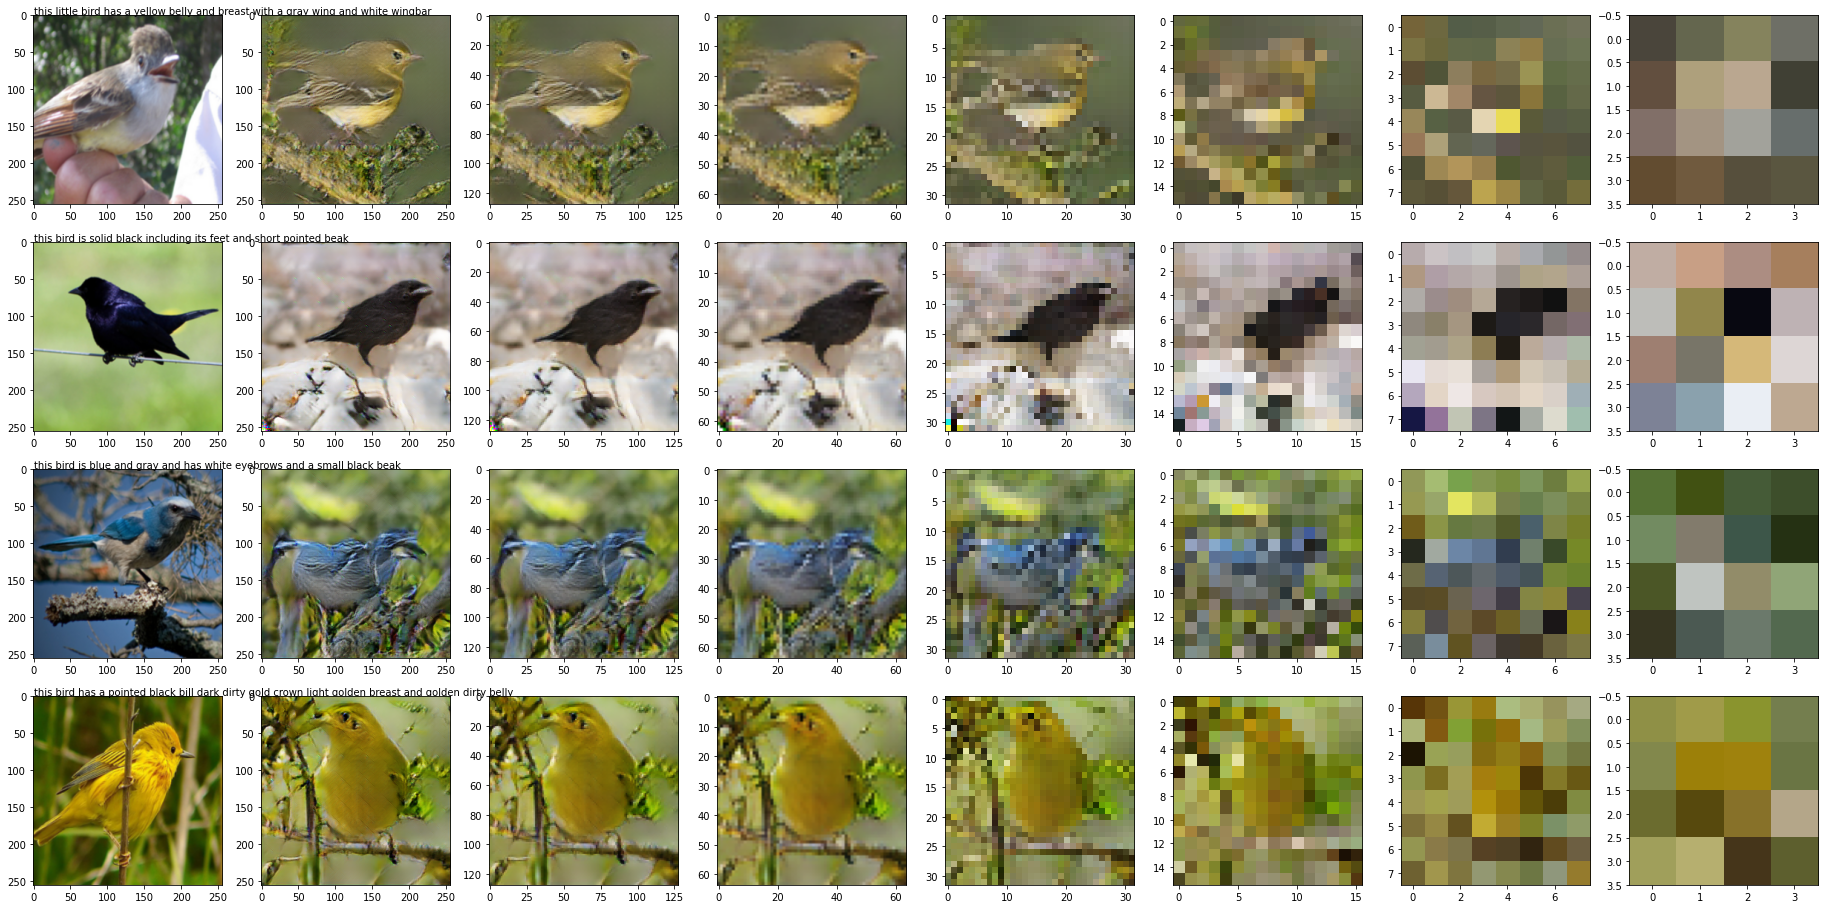

In [ ]:
trainer.show(is_ema=False)

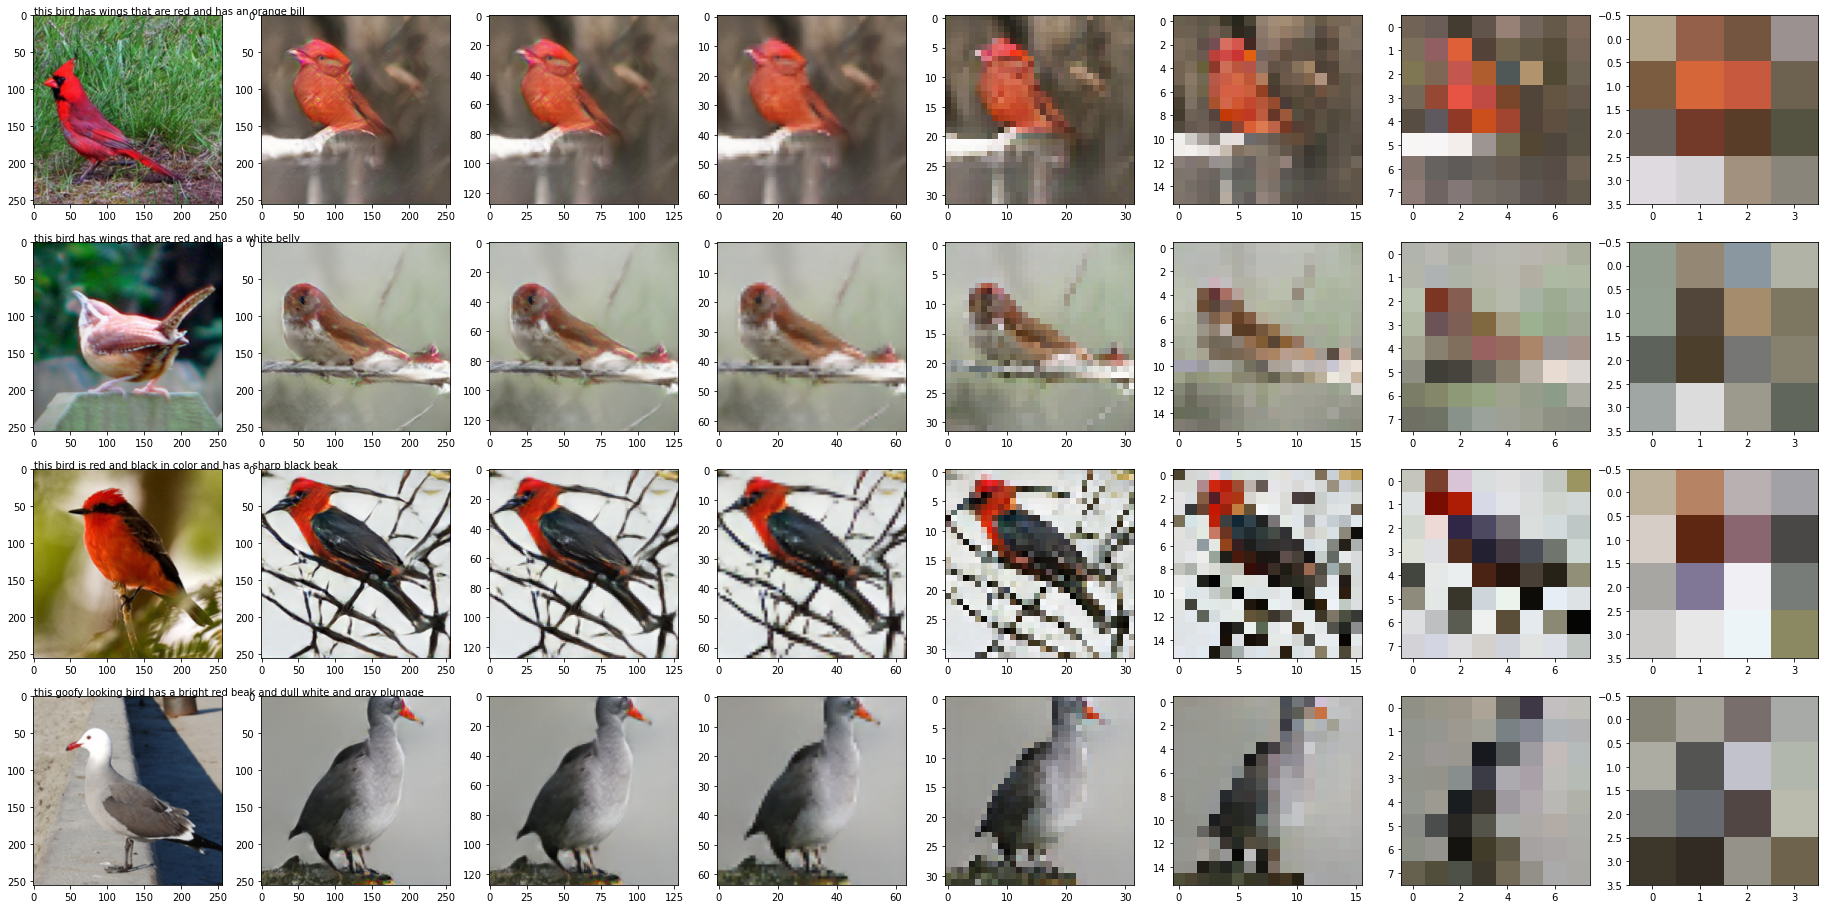

In [ ]:
trainer.show(is_ema=True)

In [ ]:
check = trainer.check_d(is_ema=True)

In [ ]:
check[1]

(tensor([[0.9997],
         [0.9852],
         [0.9949],
         [0.9760],
         [0.6487],
         [0.9350],
         [0.7138],
         [0.7514],
         [0.9572],
         [0.9368],
         [0.8783],
         [0.9369],
         [0.9689],
         [0.9989],
         [0.9651],
         [0.9895],
         [0.9056],
         [0.9646],
         [0.9761],
         [0.9910],
         [0.9704],
         [0.9866],
         [0.8979],
         [0.9673]], device='cuda:0'), tensor([[1.0217e-03],
         [5.9101e-04],
         [2.2663e-04],
         [9.2072e-09],
         [1.5338e-03],
         [6.9317e-04],
         [8.8911e-05],
         [2.1451e-04],
         [3.2855e-03],
         [7.3951e-04],
         [1.7794e-02],
         [6.9268e-04],
         [7.5821e-03],
         [2.7447e-04],
         [1.7766e-06],
         [4.8616e-08],
         [4.3875e-06],
         [2.5007e-02],
         [4.4294e-03],
         [1.0148e-01],
         [2.0785e-04],
         [3.3165e-04],
         [2.9234e-04

## Export and Inference

In [9]:
simple_caps = [
    'a small red bird',
    'a small orange bird',
    'a small blue bird',
    'a small yellow bird',
    'a small black bird',
]
medium_caps = [
    'a small white bird with orange bill',
    'a large red bird with black beak',
    'a small black bird with a yellow head',
    'a large yellow bird with long black beak',
    'this bird has a green crown, black wings and a yellow belly',
]
complex_caps = [
    'this bird has a blue crown green primaries and a red belly',
]

In [ ]:
trainer.export(model_dir/'gan_export.pt', is_ema=True)

In [10]:
model = Birds_Export.from_pretrained(model_dir/'gan_export.pt')

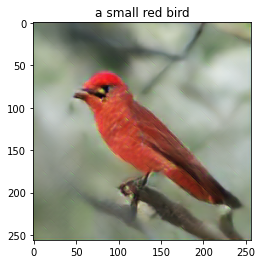

In [ ]:
cap = simple_caps[0]
pred_and_show(model, cap)

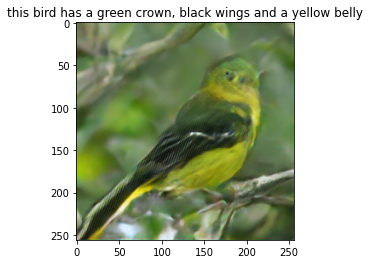

In [ ]:
cap = medium_caps[4]
pred_and_show(model, cap)

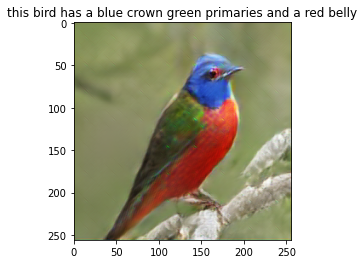

In [ ]:
cap = complex_caps[0]
pred_and_show(model, cap)

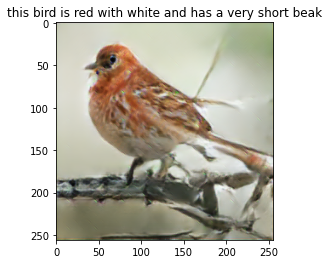

In [ ]:
cap = 'this bird is red with white and has a very short beak'
pred_and_show(model, cap)

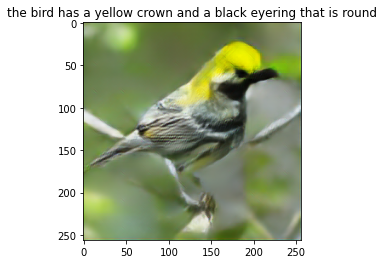

In [ ]:
cap = 'the bird has a yellow crown and a black eyering that is round'
pred_and_show(model, cap)